In [70]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
sns.set_style("darkgrid")

In [107]:
# Reading the data
df_ipl = pd.read_csv("ipl.csv")

In [108]:
df_ipl.head()

,match_code,date,city,venue,team1,team2,toss_winner,toss_decision,winner,win_type,...,batsman,non_striker,bowler,runs,extras,total,extras_type,player_out,wicket_kind,wicket_fielders
0,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,...,ST Jayasuriya,SR Tendulkar,I Sharma,0,1,1,wides,NaN,NaN,NaN
1,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,...,ST Jayasuriya,SR Tendulkar,I Sharma,1,0,1,NaN,NaN,NaN,NaN
2,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,...,SR Tendulkar,ST Jayasuriya,I Sharma,0,1,1,wides,NaN,NaN,NaN
3,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,...,SR Tendulkar,ST Jayasuriya,I Sharma,0,0,0,NaN,NaN,NaN,NaN
4,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,...,SR Tendulkar,ST Jayasuriya,I Sharma,2,0,2,NaN,NaN,NaN,NaN


In [109]:
# Listing all columns
df_ipl.columns.tolist()

['match_code',
 'date',
 'city',
 'venue',
 'team1',
 'team2',
 'toss_winner',
 'toss_decision',
 'winner',
 'win_type',
 'win_margin',
 'inning',
 'delivery',
 'batting_team',
 'batsman',
 'non_striker',
 'bowler',
 'runs',
 'extras',
 'total',
 'extras_type',
 'player_out',
 'wicket_kind',
 'wicket_fielders']

In [110]:
# No of rows and columns
df_ipl.shape

(136522, 24)

In [111]:
# Checking null values
df_ipl.isnull().sum()

match_code              0
date                    0
city                    0
venue                   0
team1                   0
team2                   0
toss_winner             0
toss_decision           0
winner               1818
win_type             1818
win_margin           1818
inning                  0
delivery                0
batting_team            0
batsman                 0
non_striker             0
bowler                  0
runs                    0
extras                  0
total                   0
extras_type        129064
player_out         129807
wicket_kind        129807
wicket_fielders    131657
dtype: int64

### Calculate the unique no. of matches in the provided dataset 

In [112]:
len(df_ipl["match_code"].unique())

577

### Find the set of all unique teams that played in the matches in the data set.

In [146]:
teams = df_ipl["batting_team"].unique().tolist()
teams

['Mumbai Indians',
 'Kolkata Knight Riders',
 'Deccan Chargers',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Pune Warriors',
 'Kings XI Punjab',
 'Delhi Daredevils',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad',
 'Kochi Tuskers Kerala',
 'Gujarat Lions',
 'Rising Pune Supergiants']

### IPL seasons are held every year now let's look at our data and extract how many seasons were recorded.

In [115]:
df_ipl["season"] = pd.to_datetime(df_ipl["date"]).dt.year

In [116]:
df_ipl["season"].unique().tolist()

[2009, 2014, 2011, 2008, 2015, 2010, 2013, 2012, 2016]

### Number of times each team have made 200+ runs

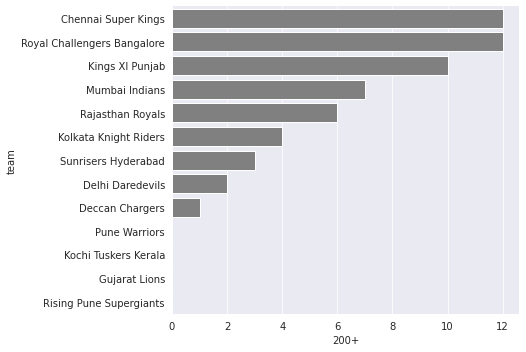

In [159]:
data = []
for team in teams:
    team_data = df_ipl[df_ipl["batting_team"] == team]
    team_runs = team_data.groupby("match_code")["total"].sum()
    team_runs = team_runs[team_runs >= 200]
    data.append(len(team_runs))
    
df_200 = pd.DataFrame({"team":teams,"200+":data}).sort_values(by="200+",ascending=False)
plot = sns.catplot(data=df_200,y="team",x="200+",kind="bar",color="grey")
plot.fig.set_figheight(5)
plot.fig.set_figwidth(10)

### What are the chances that a team scoring runs above 200  in their 1st inning is chased by the opposition in 2nd inning.

In [120]:
runs_df = df_ipl.groupby(["match_code","inning"])["total"].sum().reset_index()

In [121]:
runs_df.head()

,match_code,inning,total
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129


In [122]:
inning1 = runs_df[(runs_df["inning"] == 1) & (runs_df["total"] >= 200)]

In [123]:
inning1.head()

,match_code,inning,total
0,335982,1,222
2,335983,1,240
14,335989,1,208
16,335990,1,214
64,336014,1,204


In [124]:
inning2 = runs_df[(runs_df["inning"] == 2)]

In [125]:
inning2.head()

,match_code,inning,total
1,335982,2,82
3,335983,2,207
5,335984,2,132
7,335985,2,166
9,335986,2,112


In [126]:
final_df = pd.merge(inning1,inning2,on="match_code")

In [127]:
final_df.head()

,match_code,inning_x,total_x,inning_y,total_y
0,335982,1,222,2,82
1,335983,1,240,2,207
2,335989,1,208,2,202
3,335990,1,214,2,217
4,336014,1,204,2,181


In [128]:
winners = final_df[(final_df["total_y"] - final_df["total_x"]) > 0]

In [129]:
winners

,match_code,inning_x,total_x,inning_y,total_y
3,335990,1,214,2,217
9,419112,1,203,2,204
12,419139,1,200,2,204
17,548318,1,205,2,208
25,729283,1,205,2,206
27,734007,1,205,2,211


In [130]:
probability = len(winners)/len(final_df)

In [ ]:
win_probability = probability *100
loose_probability = 100 - win_probability 

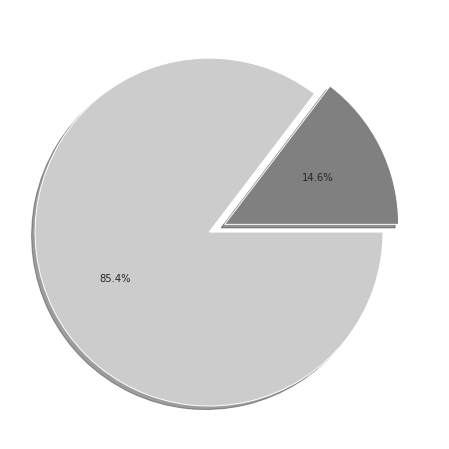

In [168]:
plt.figure(figsize=(8,8))
plt.pie([win_probability,loose_probability], shadow=True,autopct="%1.1f%%",explode=(0,0.1),colors=["grey","#ccc"])
plt.show()

### Plot top 5 teams with highest win counts across all seasons

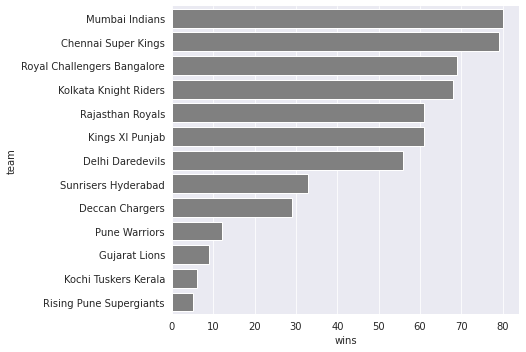

In [192]:
wins = []
for team in teams:
    wins.append(len(df_ipl[df_ipl["winner"] == team].groupby("match_code")))

    
team_wins = pd.DataFrame({"team":teams,"wins":wins}).sort_values(by="wins",ascending=False)


plot = sns.catplot(data=team_wins, y="team",x="wins",kind="bar",color="grey")
plot.fig.set_figheight(5)
plot.fig.set_figwidth(10)

### Plot the top 5 run scorers across all seasons

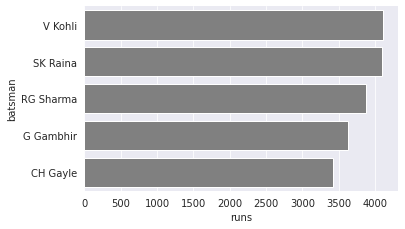

In [173]:
batsman_runs = df_ipl.groupby(["batsman"])["runs"].sum().sort_values(ascending=False).reset_index().head()

plot = sns.catplot(data=batsman_runs, y="batsman",x="runs",kind="bar",color="grey")
plot.fig.set_figheight(3)
plot.fig.set_figwidth(6)

### Plot the top 5 wicket takers across all seasons

In [55]:
wickets_delivery = df_ipl[df_ipl["wicket_kind"].notnull()]

In [56]:
wickets_delivery["wicket_kind"].unique().tolist()

['caught',
 'bowled',
 'run out',
 'lbw',
 'stumped',
 'caught and bowled',
 'obstructing the field',
 'hit wicket',
 'retired hurt']

In [58]:
remove_list = ["retired hurt","obstructing the field","run out"]

In [59]:
wickets_delivery = wickets_delivery[~wickets_delivery["wicket_kind"].isin(remove_list)]

In [62]:
bowler_wickets = wickets_delivery.groupby("bowler").size().sort_values(ascending=False).reset_index().head()
bowler_wickets.columns = ["bowler","wickets"]

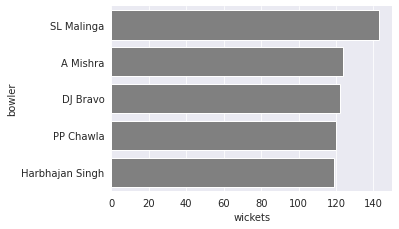

In [175]:
plot = sns.catplot(data=bowler_wickets, y="bowler",x="wickets",kind="bar",color="grey")
plot.fig.set_figheight(3)
plot.fig.set_figwidth(6)